# Checking files produced by ObsFlow

In [8]:
import xscen as xc

#cat = xc.DataCatalog('/tank/scenario/catalogues/simulation.json')
cat = xc.DataCatalog('/tank/scenario/catalogues/reconstruction.json')
cat.df
cat.search(id='GovCan_RDRS_NAM').unique('path')

['/jarre/scenario/datasets/reconstruction/NAM/GovCan/RDRS_v21/day/huss/huss_day_NAM_GovCan_RDRS_v21_1980-2018.zarr',
 '/jarre/scenario/datasets/reconstruction/NAM/GovCan/RDRS_v21/day/zgs/zgs_day_NAM_GovCan_RDRS_v21_1980-2018.zarr',
 '/jarre/scenario/datasets/reconstruction/NAM/GovCan/RDRS_v21/day/pr/pr_day_NAM_GovCan_RDRS_v21_1980-2018.zarr',
 '/jarre/scenario/datasets/reconstruction/NAM/GovCan/RDRS_v21/day/tdpsmin/tdpsmin_day_NAM_GovCan_RDRS_v21_1980-2018.zarr',
 '/jarre/scenario/datasets/reconstruction/NAM/GovCan/RDRS_v21/day/tasmin/tasmin_day_NAM_GovCan_RDRS_v21_1980-2018.zarr',
 '/jarre/scenario/datasets/reconstruction/NAM/GovCan/RDRS_v21/day/psl/psl_day_NAM_GovCan_RDRS_v21_1980-2018.zarr',
 '/jarre/scenario/datasets/reconstruction/NAM/GovCan/RDRS_v21/day/hurs/hurs_day_NAM_GovCan_RDRS_v21_1980-2018.zarr',
 '/jarre/scenario/datasets/reconstruction/NAM/GovCan/RDRS_v21/day/hursmin/hursmin_day_NAM_GovCan_RDRS_v21_1980-2018.zarr',
 '/jarre/scenario/datasets/reconstruction/NAM/GovCan/RDR

In [2]:
cat.unique(['frequency', 'xrfreq', 'variable'])
vars_df = cat.unique(['activity'])
vars_df.iloc[0]

['HighResMIP', 'ScenarioMIP', 'CMIP', 'CORDEX']

In [3]:
cat.search(variable=['tasmin'], mip_era='CMIP6', processing_level='raw', xrfreq='MS').unique('id')

['CMIP6_ScenarioMIP_NIMS-KMA_KACE-1-0-G_ssp245_r1i1p1f1_global',
 'CMIP6_ScenarioMIP_NIMS-KMA_KACE-1-0-G_ssp245_r2i1p1f1_global',
 'CMIP6_ScenarioMIP_NIMS-KMA_KACE-1-0-G_ssp245_r3i1p1f1_global',
 'CMIP6_ScenarioMIP_NIMS-KMA_KACE-1-0-G_ssp126_r2i1p1f1_global',
 'CMIP6_ScenarioMIP_NIMS-KMA_KACE-1-0-G_ssp126_r3i1p1f1_global',
 'CMIP6_ScenarioMIP_NIMS-KMA_KACE-1-0-G_ssp126_r1i1p1f1_global',
 'CMIP6_ScenarioMIP_NIMS-KMA_KACE-1-0-G_ssp585_r2i1p1f1_global',
 'CMIP6_ScenarioMIP_NIMS-KMA_KACE-1-0-G_ssp585_r3i1p1f1_global',
 'CMIP6_ScenarioMIP_NIMS-KMA_KACE-1-0-G_ssp585_r1i1p1f1_global',
 'CMIP6_CMIP_NIMS-KMA_KACE-1-0-G_historical_r1i1p1f1_global',
 'CMIP6_ScenarioMIP_NIMS-KMA_KACE-1-0-G_ssp370_r2i1p1f1_global',
 'CMIP6_ScenarioMIP_NIMS-KMA_KACE-1-0-G_ssp370_r3i1p1f1_global',
 'CMIP6_ScenarioMIP_NIMS-KMA_KACE-1-0-G_ssp370_r1i1p1f1_global']

In [55]:
cat.search(mip_era='CMIP5',)

,unique
id,474
type,1
processing_level,2
bias_adjust_institution,1
bias_adjust_project,1
mip_era,1
activity,1
driving_institution,0
driving_model,16
institution,18


### Writing AHCCD to file
- needs to be rechunked
- variables as objects should be 'astype()'

```python
# some notes here
ds.unify_chunks() # not ideal, sets chunks to 1
type_dict['save']['rechunk'] = {'rechunk': {'time': -1, 'station': -1}}
vars_to_str = ['stnid', 'station_name', 'prov', 'joined', 'rcs']
```



## Test RDRS, zarr

<xarray.Dataset>
Dimensions:       (rlat: 191, rlon: 164, time: 14245)
Coordinates:
    lat           (rlat, rlon) float32 ...
    lon           (rlat, rlon) float32 ...
  * rlat          (rlat) float32 -11.61 -11.52 -11.43 -11.34 ... 5.31 5.4 5.49
  * rlon          (rlon) float32 366.5 366.6 366.7 366.8 ... 381.0 381.1 381.2
    rotated_pole  float32 ...
  * time          (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2018-12-31
Data variables:
    crs           int64 ...
    pr            (time, rlat, rlon) float32 ...
    tas           (time, rlat, rlon) float32 ...
    tasmax        (time, rlat, rlon) float32 ...
    tasmin        (time, rlat, rlon) float32 ...
Attributes: (12/33)
    Conventions:             CF-1.8
    Remarks:                 Original variable names are following the conven...
    cat:_data_format_:       zarr
    cat:date_end:            2018-12-31 00:00:00
    cat:date_start:          1980-01-01 00:00:00
    cat:domain:              Quebec
    ...                      ...
    realm:                   atmos
    source:                  RDRS v2.1
    table_date:              12 December 2022
    table_id:                EC
    type:                    reconstruction
    version:                 v2.1

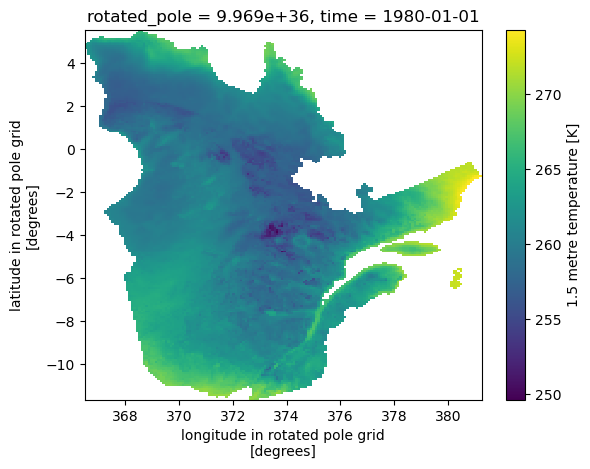

In [2]:
import xarray as xr
from pathlib import Path

data_path = Path('/scen3/braun/data/obs_synthese23/extracted')
data_path = Path('/exec/braun/data/obsflow/extracted')
ds = xr.open_dataset('/scen3/braun/data/obs_synthese23/extracted/GovCan_RDRS_NAM_D_extracted.zarr', engine='zarr')
display(ds)
ds.tas.isel(time=0).plot()

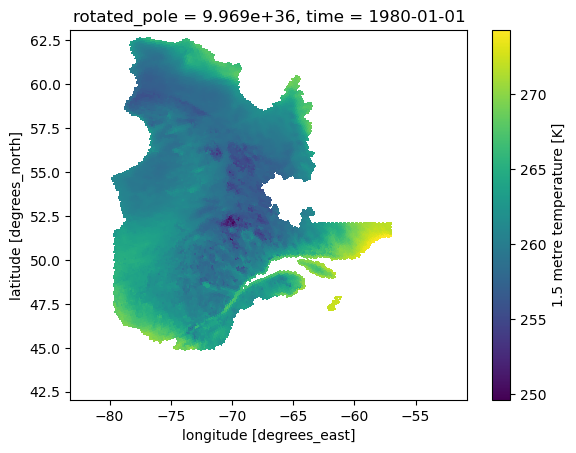

In [3]:
ds.tas.isel(time=0).plot(x='lon', y='lat')

## Test RDRS, netcdf

In [4]:
ds = xr.open_dataset('/scen3/braun/data/obs_synthese23/extracted/GovCan_RDRS_NAM_D_extracted.nc')
display(ds)
ds.tas.isel(time=0).plot()

FileNotFoundError: [Errno 2] No such file or directory: b'/scen3/braun/data/obs_synthese23/extracted/GovCan_RDRS_NAM_D_extracted.nc'

## Test ERA5-Land, zarr

<xarray.Dataset>
Dimensions:  (lat: 179, lon: 230, time: 26571)
Coordinates:
  * lat      (lat) float32 44.9 45.0 45.1 45.2 45.3 ... 62.3 62.4 62.5 62.6 62.7
  * lon      (lon) float32 -79.9 -79.8 -79.7 -79.6 ... -57.3 -57.2 -57.1 -57.0
  * time     (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2022-09-30
Data variables:
    crs      int64 ...
    pr       (time, lat, lon) float32 ...
    tas      (time, lat, lon) float32 ...
    tasmax   (time, lat, lon) float32 ...
    tasmin   (time, lat, lon) float32 ...
Attributes: (12/27)
    Conventions:             CF-1.9
    cat:_data_format_:       zarr
    cat:domain:              Quebec
    cat:frequency:           day
    cat:id:                  ECMWF_ERA5-Land_NAM
    cat:institution:         ECMWF
    ...                      ...
    processing_level:        raw
    project:                 era5-land
    realm:                   atmos
    source:                  ERA5-Land
    table_id:                ECMWF
    type:                    reconstruction

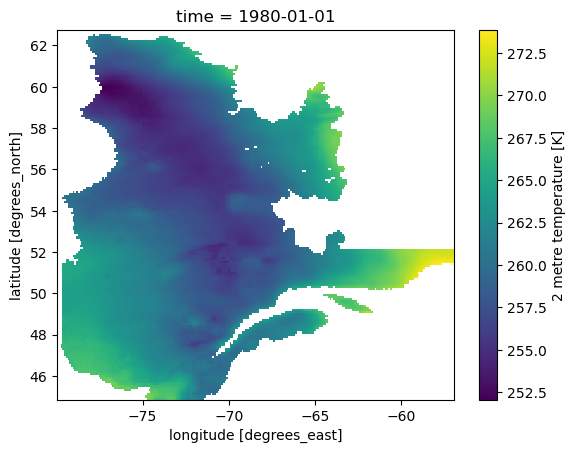

In [72]:
ds = xr.open_dataset('/scen3/braun/data/obs_synthese23/extracted/ECMWF_ERA5-Land_NAM_D_extracted.zarr', engine='zarr')
display(ds)
ds.tas.isel(time=10957).plot()

# **OFF TOPIC:**<br>Compute daily annual cycle from ERA5-Land for request from Richard Harvey, Solutions Mesonet


In [2]:
import xarray as xr

ds = xr.open_dataset('/scen3/braun/data/obs_synthese23/extracted/ECMWF_ERA5-Land_NAM_D_extracted.zarr', engine='zarr')
doy_annual_cycle = ds.sel(time=slice('1991', '2020')).groupby('time.dayofyear').mean('time')
doy_annual_cycle = doy_annual_cycle.drop_vars('crs')
doy_annual_cycle

<xarray.Dataset>
Dimensions:    (dayofyear: 366, lat: 179, lon: 230)
Coordinates:
  * lat        (lat) float32 44.9 45.0 45.1 45.2 45.3 ... 62.4 62.5 62.6 62.7
  * lon        (lon) float32 -79.9 -79.8 -79.7 -79.6 ... -57.3 -57.2 -57.1 -57.0
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366
Data variables:
    pr         (dayofyear, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    tas        (dayofyear, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    tasmax     (dayofyear, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    tasmin     (dayofyear, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes: (12/27)
    Conventions:             CF-1.9
    cat:_data_format_:       zarr
    cat:domain:              Quebec
    cat:frequency:           day
    cat:id:                  ECMWF_ERA5-Land_NAM
    cat:institution:         ECMWF
    ...                      ...
    processing_level:        raw
    project:                 era5-land
    realm:                   atmos
    source:                  ERA5-Land
    table_id:                ECMWF
    type:                    reconstruction

In [3]:
doy_annual_cycle.to_netcdf('/scen3/braun/data/richardHarvey_mesonet/ECMWF_ERA5-Land_QC_mean_daily_annual_cycle_1991-2020.nc')

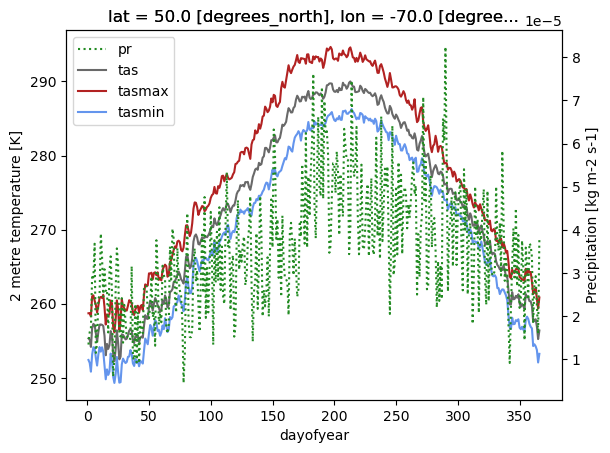

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax_t = ax.twinx()
ax.set_prop_cycle(color=['dimgray', 'firebrick', 'cornflowerblue',])
lns = []
doy_clean = doy_annual_cycle.sel(lat=50, lon=-70, method='nearest')
for name, var in doy_clean.data_vars.items():
    if 'pr' not in name:
        lns += var.plot.line(x='dayofyear', ax=ax, label=name)
    else:
        lns += var.plot(x='dayofyear', ax=ax_t, label=name, c='forestgreen', linestyle=':')
ax.legend(lns, [l.get_label() for l in lns], loc='upper left')
plt.savefig('/scen3/braun/data/richardHarvey_mesonet/ECMWF_ERA5-Land_QC_mean_daily_annual_cycle_1991-2020_exampleLocation.png', bbox_inches='tight', dpi=150)

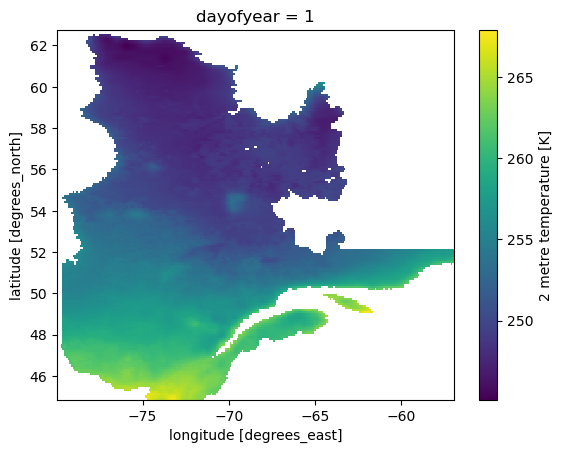

In [6]:
doy_annual_cycle.tas.sel(dayofyear=1).plot()
plt.savefig('/scen3/braun/data/richardHarvey_mesonet/ECMWF_ERA5-Land_QC_mean_daily_annual_cycle_1991-2020_extent.png', bbox_inches='tight', dpi=150)

## Test ERA5-Land, netCDF

In [2]:
ds = xr.open_dataset('/scen3/braun/data/obs_synthese23/extracted/ECMWF_ERA5-Land_NAM_D_extracted.nc')
display(ds)
ds.tas.isel(time=10957).plot()

NameError: name 'xr' is not defined

## Test AHCCD, temp, zarr

<xarray.Dataset>
Dimensions:       (station: 146, time: 66415)
Coordinates: (12/16)
    elev          (station) int32 ...
    frommonth     (station) int32 ...
    fromyear      (station) int32 ...
    joined        (station) object ...
    lat           (station) float64 ...
    lon           (station) float64 ...
    ...            ...
  * station       (station) object '7010720' '7011983' ... '7116505' '7117823'
    station_name  (station) object ...
    stnid         (station) object ...
  * time          (time) datetime64[ns] 1840-03-01 1840-03-02 ... 2021-12-31
    tomonth       (station) int32 ...
    toyear        (station) int32 ...
Data variables:
    crs           int64 ...
    tas           (station, time) float64 ...
    tasmax        (station, time) float64 ...
    tasmin        (station, time) float64 ...
Attributes: (12/25)
    cat:_data_format_:       nc
    cat:date_end:            2021-12-31 00:00:00
    cat:date_start:          1840-03-01 00:00:00
    cat:domain:              Quebec
    cat:frequency:           day
    cat:id:                  GovCan_AHCCD_CAN
    ...                      ...
    institute_id:            ECCC
    intake_esm_dataset_key:  GovCan_AHCCD_CAN.CAN.raw.D
    licence:                 https:/open.canada.ca/en/open-government-licence...
    licence_type:            permissive
    title:                   Third Generation of Homogenized Daily Temperatur...
    type:                    station_obs

['QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE'
 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE'
 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE'
 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE'
 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE'
 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE'
 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE'
 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE'
 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE'
 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE'
 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE'
 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE' 'QUE'
 'QUE' 'QUE']
Stations collected are from the following provinces: {'QUE'}


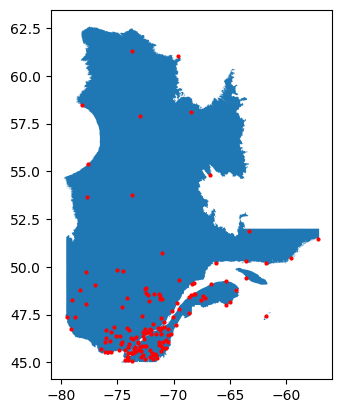

In [8]:
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd
from pathlib import Path
%matplotlib inline

ds = xr.open_dataset('/scen3/braun/data/obs_synthese23/extracted/GovCan_AHCCD_CAN_D_extracted.zarr', engine='zarr')
display(ds)
print(ds.prov.values)
print(f'Stations collected are from the following provinces: {set(ds.prov.values)}')


df=gpd.read_file('/scen3/braun/data/obs_synthese23/gis/lpr_000b16a_e_QC_simpl1.zip!lpr_000b16a_e_QC_simpl1.shp')
#df=gpd.read_file('/scen3/braun/data/obs_synthese23/gis/region_admin_poly.zip!region_admin_poly.shp')
df.plot()
plt.plot(ds.lon, ds.lat, 'or', ms=2)
#ds.plot.scatter(x='lon', y='lat')

## Test AHCCD, precip, zarr

In [10]:
data_path = Path('/exec/braun/data/obsflow')
ds = xr.open_dataset(data_path / 'extracted/GovCan_AHCCD_CAN_station-pr_D_extracted.zarr', engine='zarr')
ds

<xarray.Dataset>
Dimensions:       (station: 63, time: 24837)
Coordinates: (12/13)
    elev          (station) int32 ...
    frommonth     (station) int32 ...
    fromyear      (station) int32 ...
    lat           (station) float64 ...
    lon           (station) float64 ...
    prov          (station) object ...
    ...            ...
    station_name  (station) object ...
    stnid         (station) object ...
    stns_joined   (station) object ...
  * time          (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2017-12-31
    tomonth       (station) int32 ...
    toyear        (station) int32 ...
Data variables:
    crs           int64 ...
    pr            (station, time) float64 ...
Attributes: (12/27)
    cat:_data_format_:       nc
    cat:date_end:            2017-12-31 00:00:00
    cat:date_start:          1840-01-01 00:00:00
    cat:domain:              Quebec
    cat:frequency:           day
    cat:id:                  GovCan_AHCCD_CAN_station-pr
    ...                      ...
    intake_esm_dataset_key:  GovCan_AHCCD_CAN.CAN.raw.D
    intake_esm_vars:         ['pr']
    licence:                 https:/open.canada.ca/en/open-government-licence...
    licence_type:            permissive
    title:                   Second Generation of Daily Adjusted Precipitatio...
    type:                    station_obs

,AREA,PERIMETER,REGIO_S_,REGIO_S_ID,RES_NO_IND,RES_DE_IND,RES_CO_REG,RES_NM_REG,RES_CO_REF,RES_CO_VER,geometry
0,0.000753,0.151936,2,2,50 02 0100 000,Région administrative,09,Côte-Nord,BDGA1M,V2016-08,"POLYGON ((-66.68780 55.00005, -66.64292 55.000..."
1,0.502881,8.827434,3,4,50 02 0100 000,Région administrative,09,Côte-Nord,BDGA1M,V2016-08,"POLYGON ((-66.25978 55.00001, -66.25001 55.000..."
2,0.087798,2.025902,4,5,50 02 0100 000,Région administrative,09,Côte-Nord,BDGA1M,V2016-08,"POLYGON ((-67.21920 55.00003, -67.00000 55.000..."
3,13.298007,19.785793,5,6,50 02 0100 000,Région administrative,02,Saguenay - Lac-Saint-Jean,BDGA1M,V2016-08,"POLYGON ((-72.07341 47.95000, -72.12356 47.998..."
4,9.483150,20.867879,6,7,50 02 0100 000,Région administrative,11,Gaspésie - Îles-de-la-Madeleine,BDGA1M,V2016-08,"POLYGON ((-67.15334 49.18906, -66.99929 49.279..."
5,3.437825,11.265408,7,8,50 02 0100 000,Région administrative,01,Bas-Saint-Laurent,BDGA1M,V2016-08,"POLYGON ((-67.15334 49.18906, -66.92888 49.047..."
6,7.784731,14.963824,8,9,50 02 0100 000,Région administrative,08,Abitibi-Témiscamingue,BDGA1M,V2016-08,"POLYGON ((-75.52108 47.84699, -75.72523 47.847..."
7,4.787513,13.196677,9,10,50 02 0100 000,Région administrative,04,Mauricie,BDGA1M,V2016-08,"POLYGON ((-74.47168 48.94565, -74.23088 48.792..."
8,2.499373,8.818172,10,11,50 02 0100 000,Région administrative,03,Capitale-Nationale,BDGA1M,V2016-08,"POLYGON ((-72.07341 47.95000, -72.00000 47.950..."
9,3.996144,15.427580,11,12,50 02 0100 000,Région administrative,07,Outaouais,BDGA1M,V2016-08,"POLYGON ((-75.52108 47.84699, -75.52133 47.763..."


<Axes: >

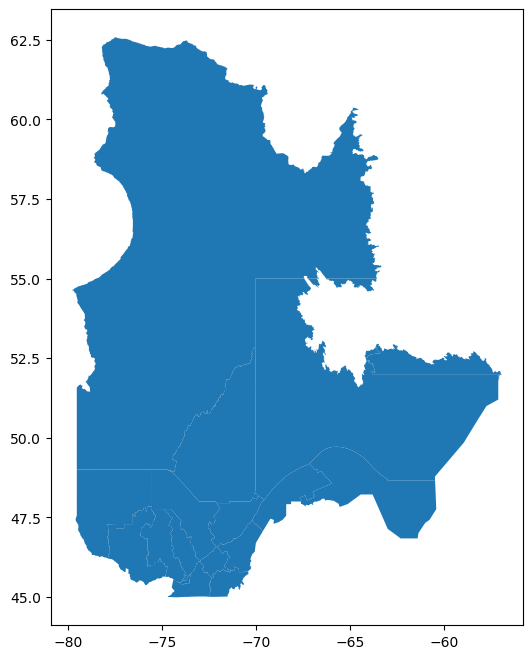

In [3]:
import geopandas as gpd
%matplotlib inline

df=gpd.read_file('/scen3/braun/data/obs_synthese23/gis/lpr_000b16a_e_QC_simpl1.zip!lpr_000b16a_e_QC_simpl1.shp')
df=gpd.read_file('/scen3/braun/data/obs_synthese23/gis/region_admin_poly.zip!region_admin_poly.shp') #.iloc[[0, 1, 2, 19]] # cote nord
display(df)
df.plot(figsize=(8,8))

## Test cleaned data

In [2]:
import xarray as xr
from pathlib import Path

workdir = Path('/exec/braun/data/obsflow/extracted-cleaned')

for file in workdir.glob('*.zarr'):
    print(file)
    ds = xr.open_dataset(file, engine='zarr')
    display(ds)
    # if 'tas' in ds.data_vars:
    #     ds.tas.isel(time=0).plot()
    # if 'pr' in ds.data_vars:
    #     ds.pr.isel(time=0).plot()
    # ds[vars[0]].isel(time=0).plot()

/exec/braun/data/obsflow/extracted-cleaned/GovCan_AHCCD_CAN_station-pr.Quebec_D_extracted-cleaned.zarr


<xarray.Dataset>
Dimensions:       (station: 63, time: 24837)
Coordinates: (12/13)
    elev          (station) int32 ...
    frommonth     (station) int32 ...
    fromyear      (station) int32 ...
    lat           (station) float64 ...
    lon           (station) float64 ...
    prov          (station) object ...
    ...            ...
    station_name  (station) object ...
    stnid         (station) object ...
    stns_joined   (station) object ...
  * time          (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2017-12-31
    tomonth       (station) int32 ...
    toyear        (station) int32 ...
Data variables:
    crs           int64 ...
    pr            (station, time) float32 ...
Attributes: (12/27)
    cat:_data_format_:       zarr
    cat:date_end:            2017-12-31 00:00:00
    cat:date_start:          1950-01-01 00:00:00
    cat:domain:              Quebec
    cat:frequency:           day
    cat:id:                  GovCan_AHCCD_CAN_station-pr
    ...                      ...
    intake_esm_dataset_key:  GovCan_AHCCD_CAN_station-pr.Quebec.extracted.D
    intake_esm_vars:         ['pr']
    licence:                 https:/open.canada.ca/en/open-government-licence...
    licence_type:            permissive
    title:                   Second Generation of Daily Adjusted Precipitatio...
    type:                    station_obs

/exec/braun/data/obsflow/extracted-cleaned/GovCan_RDRS_NAM_reconstruction.Quebec_D_extracted-cleaned.zarr


<xarray.Dataset>
Dimensions:       (rlat: 191, rlon: 162, time: 14245)
Coordinates:
    lat           (rlat, rlon) float32 ...
    lon           (rlat, rlon) float32 ...
  * rlat          (rlat) float32 -11.61 -11.52 -11.43 -11.34 ... 5.31 5.4 5.49
  * rlon          (rlon) float32 366.6 366.7 366.8 366.9 ... 380.9 381.0 381.1
    rotated_pole  float32 ...
  * time          (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2018-12-31
Data variables:
    crs           int64 ...
    pr            (time, rlat, rlon) float32 ...
    tas           (time, rlat, rlon) float32 ...
    tasmax        (time, rlat, rlon) float32 ...
    tasmin        (time, rlat, rlon) float32 ...
Attributes: (12/35)
    Conventions:             CF-1.8
    Remarks:                 Original variable names are following the conven...
    cat:_data_format_:       zarr
    cat:date_end:            2018-12-31 00:00:00
    cat:date_start:          1980-01-01 00:00:00
    cat:domain:              Quebec
    ...                      ...
    realm:                   atmos
    source:                  RDRS v2.1
    table_date:              12 December 2022
    table_id:                EC
    type:                    reconstruction
    version:                 v2.1

/exec/braun/data/obsflow/extracted-cleaned/ECMWF_ERA5-Land_NAM_reconstruction.Quebec_D_extracted-cleaned.zarr


<xarray.Dataset>
Dimensions:  (lat: 178, lon: 230, time: 26571)
Coordinates:
  * lat      (lat) float32 44.9 45.0 45.1 45.2 45.3 ... 62.2 62.3 62.4 62.5 62.6
  * lon      (lon) float32 -79.8 -79.7 -79.6 -79.5 ... -57.2 -57.1 -57.0 -56.9
  * time     (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2022-09-30
Data variables:
    crs      int64 ...
    pr       (time, lat, lon) float32 ...
    tas      (time, lat, lon) float32 ...
    tasmax   (time, lat, lon) float32 ...
    tasmin   (time, lat, lon) float32 ...
Attributes: (12/31)
    Conventions:             CF-1.9
    cat:_data_format_:       zarr
    cat:date_end:            2022-09-30 00:00:00
    cat:date_start:          1950-01-01 00:00:00
    cat:domain:              Quebec
    cat:frequency:           day
    ...                      ...
    processing_level:        raw
    project:                 era5-land
    realm:                   atmos
    source:                  ERA5-Land
    table_id:                ECMWF
    type:                    reconstruction

/exec/braun/data/obsflow/extracted-cleaned/GovCan_AHCCD_CAN_station-tas.Quebec_D_extracted-cleaned.zarr


<xarray.Dataset>
Dimensions:       (station: 146, time: 26298)
Coordinates: (12/16)
    elev          (station) int32 ...
    frommonth     (station) int32 ...
    fromyear      (station) int32 ...
    joined        (station) object ...
    lat           (station) float64 ...
    lon           (station) float64 ...
    ...            ...
  * station       (station) object '7010720' '7011983' ... '7116505' '7117823'
    station_name  (station) object ...
    stnid         (station) object ...
  * time          (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2021-12-31
    tomonth       (station) int32 ...
    toyear        (station) int32 ...
Data variables:
    crs           int64 ...
    tas           (station, time) float32 ...
    tasmax        (station, time) float32 ...
    tasmin        (station, time) float32 ...
Attributes: (12/27)
    cat:_data_format_:       zarr
    cat:date_end:            2021-12-31 00:00:00
    cat:date_start:          1950-01-01 00:00:00
    cat:domain:              Quebec
    cat:frequency:           day
    cat:id:                  GovCan_AHCCD_CAN_station-tas
    ...                      ...
    intake_esm_dataset_key:  GovCan_AHCCD_CAN_station-tas.Quebec.extracted.D
    intake_esm_vars:         ['tasmin', 'tasmax', 'tas']
    licence:                 https:/open.canada.ca/en/open-government-licence...
    licence_type:            permissive
    title:                   Third Generation of Homogenized Daily Temperatur...
    type:                    station_obs

## Test properties/indicators from diagnostics

In [3]:
import xarray as xr
ds = xr.open_dataset('/scen3/braun/data/obs_synthese23/diag-properties/GovCan_RDRS_NAM_fx_diag-properties.zarr', engine='zarr')
display(ds)
# ds = xr.open_dataset('/scen3/braun/data/obs_synthese23/diag-properties/ECMWF_ERA5-Land_NAM_fx_diag-properties.zarr', engine='zarr')
# display(ds)
ds = xr.open_dataset('/scen3/braun/data/obs_synthese23/climatology/GovCan_AHCCD_CAN_fx_climatology.zarr', engine='zarr')
display(ds)

FileNotFoundError: No such file or directory: '/scen3/braun/data/obs_synthese23/diag-properties/GovCan_RDRS_NAM_fx_diag-properties.zarr'

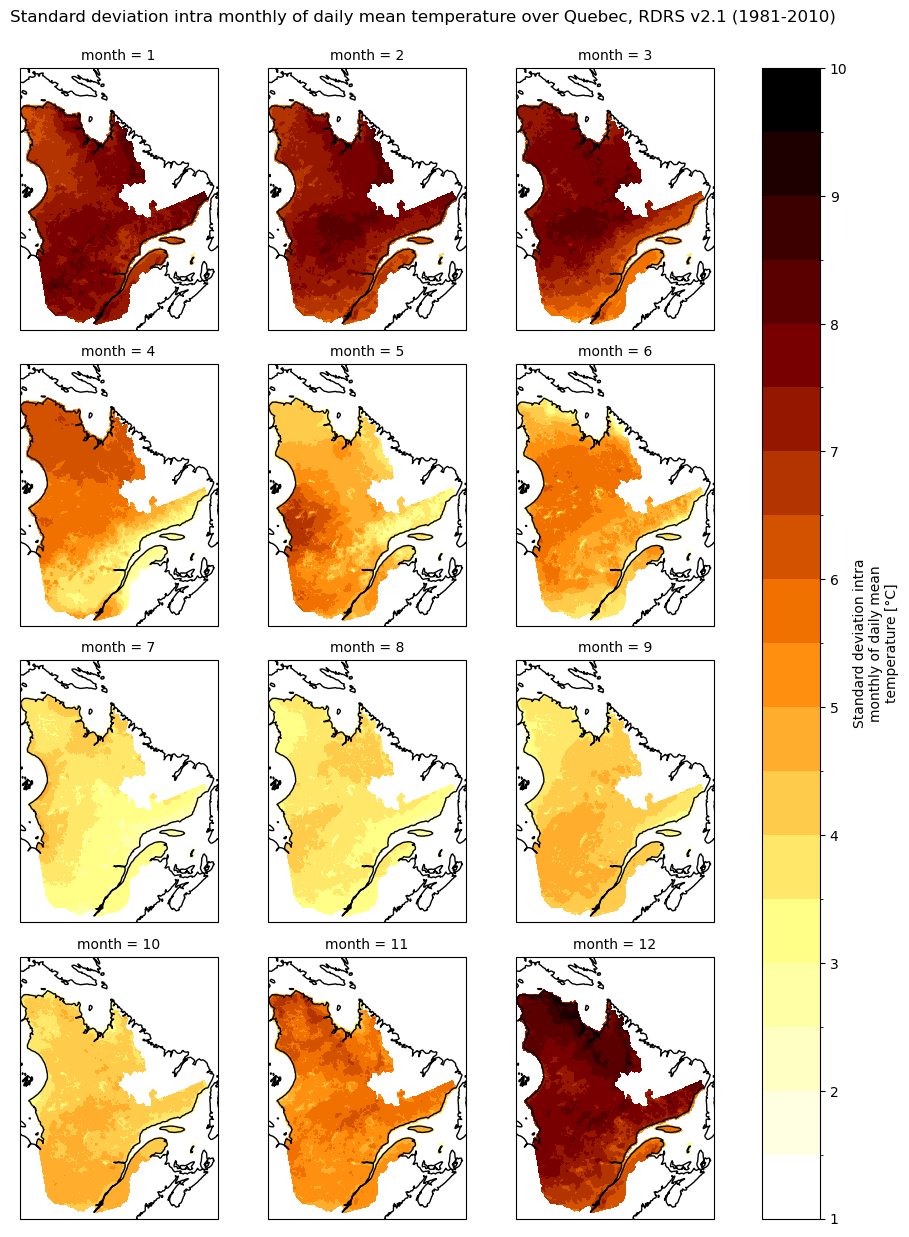

In [81]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

%matplotlib inline
ind = 'tas_std_mon'
period = '1981-2010'
#fp = ds['tas_ind_mon'].sel(period='1981-2010').plot.contourf(x='lon', y='lat', col='month', col_wrap=3, cmap='RdBu_r', levels=20, vmin=-40, vmax=40)
fp = ds[ind].sel(period=period).plot.contourf(transform=ccrs.PlateCarree(),
    x='lon', y='lat',
    col='month', col_wrap=3,
    subplot_kws={'projection': ccrs.LambertConformal()},
    #cmap='RdBu_r', levels=20
    cmap='afmhot_r', levels=20
)
fp.fig.suptitle(f"{ds[ind].attrs['long_name']} over Quebec, {ds.attrs['source']} ({period})", y=1.02)
for ax in fp.axs.flat:
    ax.coastlines()
    ax.margins(0)
    ax.set_extent([-78, -60, 45, 63], crs=ccrs.PlateCarree())

#plt.tight_layout()
#.tight_layout(rect=[0, 0, 1, 0.98])
fp.fig.savefig(f"/scen3/braun/data/obs_synthese23/image/{ds[ind].attrs['long_name']} over Quebec {ds.attrs['source']} {period}.png".replace(' ', '_'), bbox_inches='tight', dpi=300)
fp
#ds['tas_mean_sea'].plot.contourf(x='lon', y='lat', col='season', col_wrap=2, cmap='RdBu_r', levels=20)
#ds10.plot()

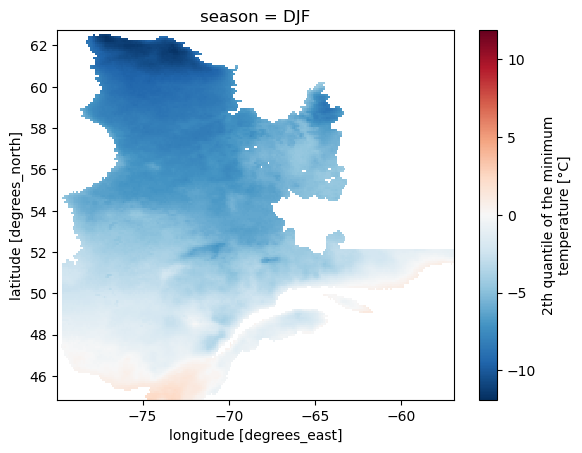

In [46]:
ds['quantile_02-tasmin'].sel(season='DJF').plot()

## Test properties/indicators from diagnostics

In [77]:
'Mean temperature over land'.title().replace(' ', '_')

'Mean_Temperature_Over_Land'

<xarray.Dataset>
Dimensions:  (lat: 178, lon: 230, time: 873)
Coordinates:
  * lat      (lat) float32 44.9 45.0 45.1 45.2 45.3 ... 62.2 62.3 62.4 62.5 62.6
  * lon      (lon) float32 -79.8 -79.7 -79.6 -79.5 ... -57.2 -57.1 -57.0 -56.9
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2022-09-01
Data variables:
    pr_mean  (time, lat, lon) float32 ...
    pr_std   (time, lat, lon) float32 ...
    tg_mean  (time, lat, lon) float32 ...
    tg_std   (time, lat, lon) float32 ...
    tn_mean  (time, lat, lon) float32 ...
    tn_std   (time, lat, lon) float32 ...
    tx_mean  (time, lat, lon) float32 ...
    tx_std   (time, lat, lon) float32 ...
Attributes: (12/31)
    Conventions:             CF-1.9
    cat:_data_format_:       zarr
    cat:date_end:            2022-09-30 00:00:00
    cat:date_start:          1950-01-01 00:00:00
    cat:domain:              Quebec
    cat:frequency:           mon
    ...                      ...
    processing_level:        raw
    project:                 era5-land
    realm:                   atmos
    source:                  ERA5-Land
    table_id:                ECMWF
    type:                    reconstruction

no


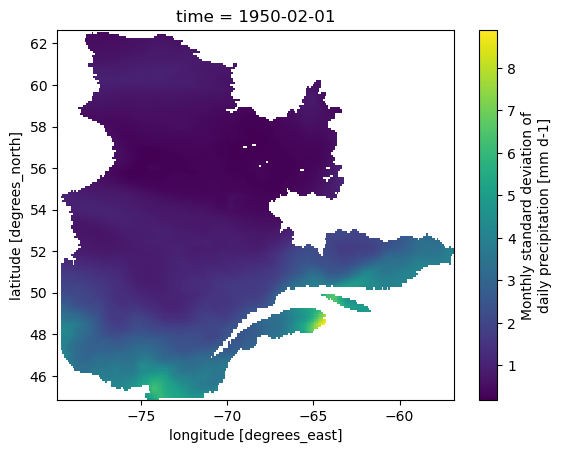

In [6]:
import xarray as xr

xrfreq = 'MS' # 'QS-DEC'
ds = xr.open_dataset(f'/exec/braun/data/obsflow/indicators/ECMWF_ERA5-Land_NAM_reconstruction_{xrfreq}_indicators.zarr', engine='zarr')
display(ds)
ds.pr_std.isel(time=1).plot()
ds = xr.Dataset()
if ds:
    print('yes')
else:
    print('no')

## The indicators files

In [1]:
import xarray as xr
from pathlib import Path

workdir = Path('/scen3/braun/data/obs_synthese23')
id = ''
workdir = Path('/exec/braun/data/obsflow')
id = '_reconstruction'

workdir = Path('/exec/braun/data/obsflow/indicators')

for file in workdir.glob('*.zarr'):
    print(file)
    ds = xr.open_dataset(file, engine='zarr')
    display(ds)
# ds = xr.open_dataset(workdir / f'indicators/ECMWF_ERA5-Land_NAM{id}_AS-JAN_indicators.zarr', engine='zarr')
# display('indicators AS-JAN', ds)
# ds = xr.open_dataset(workdir / f'indicators/ECMWF_ERA5-Land_NAM{id}_QS-DEC_indicators.zarr', engine='zarr')
# display('indicators QS-DEC', ds)
# ds = xr.open_dataset(workdir / f'indicators/ECMWF_ERA5-Land_NAM{id}_MS_indicators.zarr', engine='zarr')
# #display('indicators MS', ds.isel(time=1).mean().values)
# display('indicators MS', ds)
#dir(ds)

/exec/braun/data/obsflow/indicators/GovCan_AHCCD_CAN_station-pr_AS-JAN_indicators.zarr


<xarray.Dataset>
Dimensions:       (station: 63, time: 68)
Coordinates: (12/13)
    elev          (station) int32 ...
    frommonth     (station) int32 ...
    fromyear      (station) int32 ...
    lat           (station) float64 ...
    lon           (station) float64 ...
    prov          (station) object ...
    ...            ...
    station_name  (station) object ...
    stnid         (station) object ...
    stns_joined   (station) object ...
  * time          (time) datetime64[ns] 1950-01-01 1951-01-01 ... 2017-01-01
    tomonth       (station) int32 ...
    toyear        (station) int32 ...
Data variables:
    pr_mean       (station, time) float32 ...
    pr_std        (station, time) float32 ...
Attributes: (12/27)
    cat:_data_format_:       zarr
    cat:date_end:            2017-12-31 00:00:00
    cat:date_start:          1950-01-01 00:00:00
    cat:domain:              Quebec
    cat:frequency:           yr
    cat:id:                  GovCan_AHCCD_CAN_station-pr
    ...                      ...
    intake_esm_dataset_key:  GovCan_AHCCD_CAN_station-pr.Quebec.extracted-cle...
    intake_esm_vars:         ['pr']
    licence:                 https:/open.canada.ca/en/open-government-licence...
    licence_type:            permissive
    title:                   Second Generation of Daily Adjusted Precipitatio...
    type:                    station_obs

/exec/braun/data/obsflow/indicators/GovCan_AHCCD_CAN_station-pr_QS-DEC_indicators.zarr


<xarray.Dataset>
Dimensions:       (station: 63, time: 272)
Coordinates: (12/13)
    elev          (station) int32 ...
    frommonth     (station) int32 ...
    fromyear      (station) int32 ...
    lat           (station) float64 ...
    lon           (station) float64 ...
    prov          (station) object ...
    ...            ...
    station_name  (station) object ...
    stnid         (station) object ...
    stns_joined   (station) object ...
  * time          (time) datetime64[ns] 1950-03-01 1950-06-01 ... 2017-12-01
    tomonth       (station) int32 ...
    toyear        (station) int32 ...
Data variables:
    pr_mean       (station, time) float32 ...
    pr_std        (station, time) float32 ...
Attributes: (12/27)
    cat:_data_format_:       zarr
    cat:date_end:            2017-12-31 00:00:00
    cat:date_start:          1950-01-01 00:00:00
    cat:domain:              Quebec
    cat:frequency:           qtr
    cat:id:                  GovCan_AHCCD_CAN_station-pr
    ...                      ...
    intake_esm_dataset_key:  GovCan_AHCCD_CAN_station-pr.Quebec.extracted-cle...
    intake_esm_vars:         ['pr']
    licence:                 https:/open.canada.ca/en/open-government-licence...
    licence_type:            permissive
    title:                   Second Generation of Daily Adjusted Precipitatio...
    type:                    station_obs

/exec/braun/data/obsflow/indicators/GovCan_AHCCD_CAN_station-pr_MS_indicators.zarr


<xarray.Dataset>
Dimensions:       (station: 63, time: 816)
Coordinates: (12/13)
    elev          (station) int32 ...
    frommonth     (station) int32 ...
    fromyear      (station) int32 ...
    lat           (station) float64 ...
    lon           (station) float64 ...
    prov          (station) object ...
    ...            ...
    station_name  (station) object ...
    stnid         (station) object ...
    stns_joined   (station) object ...
  * time          (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2017-12-01
    tomonth       (station) int32 ...
    toyear        (station) int32 ...
Data variables:
    pr_mean       (station, time) float32 ...
    pr_std        (station, time) float32 ...
Attributes: (12/27)
    cat:_data_format_:       zarr
    cat:date_end:            2017-12-31 00:00:00
    cat:date_start:          1950-01-01 00:00:00
    cat:domain:              Quebec
    cat:frequency:           mon
    cat:id:                  GovCan_AHCCD_CAN_station-pr
    ...                      ...
    intake_esm_dataset_key:  GovCan_AHCCD_CAN_station-pr.Quebec.extracted-cle...
    intake_esm_vars:         ['pr']
    licence:                 https:/open.canada.ca/en/open-government-licence...
    licence_type:            permissive
    title:                   Second Generation of Daily Adjusted Precipitatio...
    type:                    station_obs

/exec/braun/data/obsflow/indicators/GovCan_AHCCD_CAN_station-tas_AS-JAN_indicators.zarr


<xarray.Dataset>
Dimensions:       (station: 146, time: 72)
Coordinates: (12/16)
    elev          (station) int32 ...
    frommonth     (station) int32 ...
    fromyear      (station) int32 ...
    joined        (station) object ...
    lat           (station) float64 ...
    lon           (station) float64 ...
    ...            ...
  * station       (station) object '7010720' '7011983' ... '7116505' '7117823'
    station_name  (station) object ...
    stnid         (station) object ...
  * time          (time) datetime64[ns] 1950-01-01 1951-01-01 ... 2021-01-01
    tomonth       (station) int32 ...
    toyear        (station) int32 ...
Data variables:
    tg_mean       (station, time) float32 ...
    tg_std        (station, time) float32 ...
    tn_mean       (station, time) float32 ...
    tn_std        (station, time) float32 ...
    tx_mean       (station, time) float32 ...
    tx_std        (station, time) float32 ...
Attributes: (12/27)
    cat:_data_format_:       zarr
    cat:date_end:            2021-12-31 00:00:00
    cat:date_start:          1950-01-01 00:00:00
    cat:domain:              Quebec
    cat:frequency:           yr
    cat:id:                  GovCan_AHCCD_CAN_station-tas
    ...                      ...
    intake_esm_dataset_key:  GovCan_AHCCD_CAN_station-tas.Quebec.extracted-cl...
    intake_esm_vars:         ['tas', 'tasmax', 'tasmin']
    licence:                 https:/open.canada.ca/en/open-government-licence...
    licence_type:            permissive
    title:                   Third Generation of Homogenized Daily Temperatur...
    type:                    station_obs

/exec/braun/data/obsflow/indicators/GovCan_AHCCD_CAN_station-tas_QS-DEC_indicators.zarr


<xarray.Dataset>
Dimensions:       (station: 146, time: 288)
Coordinates: (12/16)
    elev          (station) int32 ...
    frommonth     (station) int32 ...
    fromyear      (station) int32 ...
    joined        (station) object ...
    lat           (station) float64 ...
    lon           (station) float64 ...
    ...            ...
  * station       (station) object '7010720' '7011983' ... '7116505' '7117823'
    station_name  (station) object ...
    stnid         (station) object ...
  * time          (time) datetime64[ns] 1950-03-01 1950-06-01 ... 2021-12-01
    tomonth       (station) int32 ...
    toyear        (station) int32 ...
Data variables:
    tg_mean       (station, time) float32 ...
    tg_std        (station, time) float32 ...
    tn_mean       (station, time) float32 ...
    tn_std        (station, time) float32 ...
    tx_mean       (station, time) float32 ...
    tx_std        (station, time) float32 ...
Attributes: (12/27)
    cat:_data_format_:       zarr
    cat:date_end:            2021-12-31 00:00:00
    cat:date_start:          1950-01-01 00:00:00
    cat:domain:              Quebec
    cat:frequency:           qtr
    cat:id:                  GovCan_AHCCD_CAN_station-tas
    ...                      ...
    intake_esm_dataset_key:  GovCan_AHCCD_CAN_station-tas.Quebec.extracted-cl...
    intake_esm_vars:         ['tas', 'tasmax', 'tasmin']
    licence:                 https:/open.canada.ca/en/open-government-licence...
    licence_type:            permissive
    title:                   Third Generation of Homogenized Daily Temperatur...
    type:                    station_obs

/exec/braun/data/obsflow/indicators/GovCan_AHCCD_CAN_station-tas_MS_indicators.zarr


<xarray.Dataset>
Dimensions:       (station: 146, time: 864)
Coordinates: (12/16)
    elev          (station) int32 ...
    frommonth     (station) int32 ...
    fromyear      (station) int32 ...
    joined        (station) object ...
    lat           (station) float64 ...
    lon           (station) float64 ...
    ...            ...
  * station       (station) object '7010720' '7011983' ... '7116505' '7117823'
    station_name  (station) object ...
    stnid         (station) object ...
  * time          (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2021-12-01
    tomonth       (station) int32 ...
    toyear        (station) int32 ...
Data variables:
    tg_mean       (station, time) float32 ...
    tg_std        (station, time) float32 ...
    tn_mean       (station, time) float32 ...
    tn_std        (station, time) float32 ...
    tx_mean       (station, time) float32 ...
    tx_std        (station, time) float32 ...
Attributes: (12/27)
    cat:_data_format_:       zarr
    cat:date_end:            2021-12-31 00:00:00
    cat:date_start:          1950-01-01 00:00:00
    cat:domain:              Quebec
    cat:frequency:           mon
    cat:id:                  GovCan_AHCCD_CAN_station-tas
    ...                      ...
    intake_esm_dataset_key:  GovCan_AHCCD_CAN_station-tas.Quebec.extracted-cl...
    intake_esm_vars:         ['tas', 'tasmax', 'tasmin']
    licence:                 https:/open.canada.ca/en/open-government-licence...
    licence_type:            permissive
    title:                   Third Generation of Homogenized Daily Temperatur...
    type:                    station_obs

/exec/braun/data/obsflow/indicators/GovCan_RDRS_NAM_reconstruction_AS-JAN_indicators.zarr


<xarray.Dataset>
Dimensions:       (rlat: 191, rlon: 162, time: 39)
Coordinates:
    lat           (rlat, rlon) float32 ...
    lon           (rlat, rlon) float32 ...
  * rlat          (rlat) float32 -11.61 -11.52 -11.43 -11.34 ... 5.31 5.4 5.49
  * rlon          (rlon) float32 366.6 366.7 366.8 366.9 ... 380.9 381.0 381.1
    rotated_pole  float32 ...
  * time          (time) datetime64[ns] 1980-01-01 1981-01-01 ... 2018-01-01
Data variables:
    pr_mean       (time, rlat, rlon) float32 ...
    pr_std        (time, rlat, rlon) float32 ...
    tg_mean       (time, rlat, rlon) float32 ...
    tg_std        (time, rlat, rlon) float32 ...
    tn_mean       (time, rlat, rlon) float32 ...
    tn_std        (time, rlat, rlon) float32 ...
    tx_mean       (time, rlat, rlon) float32 ...
    tx_std        (time, rlat, rlon) float32 ...
Attributes: (12/35)
    Conventions:             CF-1.8
    Remarks:                 Original variable names are following the conven...
    cat:_data_format_:       zarr
    cat:date_end:            2018-12-31 00:00:00
    cat:date_start:          1980-01-01 00:00:00
    cat:domain:              Quebec
    ...                      ...
    realm:                   atmos
    source:                  RDRS v2.1
    table_date:              12 December 2022
    table_id:                EC
    type:                    reconstruction
    version:                 v2.1

/exec/braun/data/obsflow/indicators/GovCan_RDRS_NAM_reconstruction_QS-DEC_indicators.zarr


<xarray.Dataset>
Dimensions:       (rlat: 191, rlon: 162, time: 156)
Coordinates:
    lat           (rlat, rlon) float32 ...
    lon           (rlat, rlon) float32 ...
  * rlat          (rlat) float32 -11.61 -11.52 -11.43 -11.34 ... 5.31 5.4 5.49
  * rlon          (rlon) float32 366.6 366.7 366.8 366.9 ... 380.9 381.0 381.1
    rotated_pole  float32 ...
  * time          (time) datetime64[ns] 1980-03-01 1980-06-01 ... 2018-12-01
Data variables:
    pr_mean       (time, rlat, rlon) float32 ...
    pr_std        (time, rlat, rlon) float32 ...
    tg_mean       (time, rlat, rlon) float32 ...
    tg_std        (time, rlat, rlon) float32 ...
    tn_mean       (time, rlat, rlon) float32 ...
    tn_std        (time, rlat, rlon) float32 ...
    tx_mean       (time, rlat, rlon) float32 ...
    tx_std        (time, rlat, rlon) float32 ...
Attributes: (12/35)
    Conventions:             CF-1.8
    Remarks:                 Original variable names are following the conven...
    cat:_data_format_:       zarr
    cat:date_end:            2018-12-31 00:00:00
    cat:date_start:          1980-01-01 00:00:00
    cat:domain:              Quebec
    ...                      ...
    realm:                   atmos
    source:                  RDRS v2.1
    table_date:              12 December 2022
    table_id:                EC
    type:                    reconstruction
    version:                 v2.1

/exec/braun/data/obsflow/indicators/GovCan_RDRS_NAM_reconstruction_MS_indicators.zarr


<xarray.Dataset>
Dimensions:       (rlat: 191, rlon: 162, time: 468)
Coordinates:
    lat           (rlat, rlon) float32 ...
    lon           (rlat, rlon) float32 ...
  * rlat          (rlat) float32 -11.61 -11.52 -11.43 -11.34 ... 5.31 5.4 5.49
  * rlon          (rlon) float32 366.6 366.7 366.8 366.9 ... 380.9 381.0 381.1
    rotated_pole  float32 ...
  * time          (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2018-12-01
Data variables:
    pr_mean       (time, rlat, rlon) float32 ...
    pr_std        (time, rlat, rlon) float32 ...
    tg_mean       (time, rlat, rlon) float32 ...
    tg_std        (time, rlat, rlon) float32 ...
    tn_mean       (time, rlat, rlon) float32 ...
    tn_std        (time, rlat, rlon) float32 ...
    tx_mean       (time, rlat, rlon) float32 ...
    tx_std        (time, rlat, rlon) float32 ...
Attributes: (12/35)
    Conventions:             CF-1.8
    Remarks:                 Original variable names are following the conven...
    cat:_data_format_:       zarr
    cat:date_end:            2018-12-31 00:00:00
    cat:date_start:          1980-01-01 00:00:00
    cat:domain:              Quebec
    ...                      ...
    realm:                   atmos
    source:                  RDRS v2.1
    table_date:              12 December 2022
    table_id:                EC
    type:                    reconstruction
    version:                 v2.1

/exec/braun/data/obsflow/indicators/ECMWF_ERA5-Land_NAM_reconstruction_AS-JAN_indicators.zarr


<xarray.Dataset>
Dimensions:  (lat: 178, lon: 230, time: 73)
Coordinates:
  * lat      (lat) float32 44.9 45.0 45.1 45.2 45.3 ... 62.2 62.3 62.4 62.5 62.6
  * lon      (lon) float32 -79.8 -79.7 -79.6 -79.5 ... -57.2 -57.1 -57.0 -56.9
  * time     (time) datetime64[ns] 1950-01-01 1951-01-01 ... 2022-01-01
Data variables:
    pr_mean  (time, lat, lon) float32 ...
    pr_std   (time, lat, lon) float32 ...
    tg_mean  (time, lat, lon) float32 ...
    tg_std   (time, lat, lon) float32 ...
    tn_mean  (time, lat, lon) float32 ...
    tn_std   (time, lat, lon) float32 ...
    tx_mean  (time, lat, lon) float32 ...
    tx_std   (time, lat, lon) float32 ...
Attributes: (12/31)
    Conventions:             CF-1.9
    cat:_data_format_:       zarr
    cat:date_end:            2022-09-30 00:00:00
    cat:date_start:          1950-01-01 00:00:00
    cat:domain:              Quebec
    cat:frequency:           yr
    ...                      ...
    processing_level:        raw
    project:                 era5-land
    realm:                   atmos
    source:                  ERA5-Land
    table_id:                ECMWF
    type:                    reconstruction

/exec/braun/data/obsflow/indicators/ECMWF_ERA5-Land_NAM_reconstruction_QS-DEC_indicators.zarr


<xarray.Dataset>
Dimensions:  (lat: 178, lon: 230, time: 291)
Coordinates:
  * lat      (lat) float32 44.9 45.0 45.1 45.2 45.3 ... 62.2 62.3 62.4 62.5 62.6
  * lon      (lon) float32 -79.8 -79.7 -79.6 -79.5 ... -57.2 -57.1 -57.0 -56.9
  * time     (time) datetime64[ns] 1950-03-01 1950-06-01 ... 2022-09-01
Data variables:
    pr_mean  (time, lat, lon) float32 ...
    pr_std   (time, lat, lon) float32 ...
    tg_mean  (time, lat, lon) float32 ...
    tg_std   (time, lat, lon) float32 ...
    tn_mean  (time, lat, lon) float32 ...
    tn_std   (time, lat, lon) float32 ...
    tx_mean  (time, lat, lon) float32 ...
    tx_std   (time, lat, lon) float32 ...
Attributes: (12/31)
    Conventions:             CF-1.9
    cat:_data_format_:       zarr
    cat:date_end:            2022-09-30 00:00:00
    cat:date_start:          1950-01-01 00:00:00
    cat:domain:              Quebec
    cat:frequency:           qtr
    ...                      ...
    processing_level:        raw
    project:                 era5-land
    realm:                   atmos
    source:                  ERA5-Land
    table_id:                ECMWF
    type:                    reconstruction

/exec/braun/data/obsflow/indicators/ECMWF_ERA5-Land_NAM_reconstruction_MS_indicators.zarr


<xarray.Dataset>
Dimensions:  (lat: 178, lon: 230, time: 873)
Coordinates:
  * lat      (lat) float32 44.9 45.0 45.1 45.2 45.3 ... 62.2 62.3 62.4 62.5 62.6
  * lon      (lon) float32 -79.8 -79.7 -79.6 -79.5 ... -57.2 -57.1 -57.0 -56.9
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2022-09-01
Data variables:
    pr_mean  (time, lat, lon) float32 ...
    pr_std   (time, lat, lon) float32 ...
    tg_mean  (time, lat, lon) float32 ...
    tg_std   (time, lat, lon) float32 ...
    tn_mean  (time, lat, lon) float32 ...
    tn_std   (time, lat, lon) float32 ...
    tx_mean  (time, lat, lon) float32 ...
    tx_std   (time, lat, lon) float32 ...
Attributes: (12/31)
    Conventions:             CF-1.9
    cat:_data_format_:       zarr
    cat:date_end:            2022-09-30 00:00:00
    cat:date_start:          1950-01-01 00:00:00
    cat:domain:              Quebec
    cat:frequency:           mon
    ...                      ...
    processing_level:        raw
    project:                 era5-land
    realm:                   atmos
    source:                  ERA5-Land
    table_id:                ECMWF
    type:                    reconstruction

## The climatology files

In [1]:
import xarray as xr

ds = xr.open_dataset('/scen3/braun/data/obs_synthese23/climatology/ECMWF_ERA5-Land_NAM_AS-JAN_climatology.zarr', engine='zarr')
display('climatology ECMWF AS-JAN', ds)
ds = xr.open_dataset('/scen3/braun/data/obs_synthese23/climatology/ECMWF_ERA5-Land_NAM_QS-DEC_climatology.zarr', engine='zarr')
display('climatology ECMWF QS-DEC', ds)
ds = xr.open_dataset('/scen3/braun/data/obs_synthese23/climatology/ECMWF_ERA5-Land_NAM_MS_climatology.zarr', engine='zarr')
display('climatology ECMWF MS', ds)
ds = xr.open_dataset('/scen3/braun/data/obs_synthese23/climatology/GovCan_RDRS_NAM_MS_climatology.zarr', engine='zarr')
display('climatology RDRS MS', ds)

'climatology ECMWF AS-JAN'

<xarray.Dataset>
Dimensions:                  (horizon: 6, lat: 179, linreg_param: 6, lon: 230)
Coordinates:
  * horizon                  (horizon) <U9 '1951-1980' ... '1991-2020'
  * lat                      (lat) float32 44.9 45.0 45.1 ... 62.5 62.6 62.7
  * linreg_param             (linreg_param) <U16 'slope' ... 'intercept_stderr'
  * lon                      (lon) float32 -79.9 -79.8 -79.7 ... -57.1 -57.0
Data variables: (12/20)
    pr_mean_clim_linregress  (horizon, lat, lon, linreg_param) float32 ...
    pr_mean_clim_mean        (horizon, lat, lon) float64 ...
    pr_mean_clim_std         (horizon, lat, lon) float64 ...
    pr_std_clim_mean         (horizon, lat, lon) float32 ...
    pr_std_clim_total        (horizon, lat, lon) float64 ...
    tg_mean_clim_linregress  (horizon, lat, lon, linreg_param) float32 ...
    ...                       ...
    tn_std_clim_total        (horizon, lat, lon) float32 ...
    tx_mean_clim_linregress  (horizon, lat, lon, linreg_param) float32 ...
    tx_mean_clim_mean        (horizon, lat, lon) float32 ...
    tx_mean_clim_std         (horizon, lat, lon) float32 ...
    tx_std_clim_mean         (horizon, lat, lon) float32 ...
    tx_std_clim_total        (horizon, lat, lon) float32 ...
Attributes: (12/31)
    Conventions:             CF-1.9
    cat:_data_format_:       zarr
    cat:date_end:            2022-01-01 00:00:00
    cat:date_start:          1950-01-01 00:00:00
    cat:domain:              Quebec
    cat:frequency:           yr
    ...                      ...
    processing_level:        raw
    project:                 era5-land
    realm:                   atmos
    source:                  ERA5-Land
    table_id:                ECMWF
    type:                    reconstruction

'climatology ECMWF QS-DEC'

<xarray.Dataset>
Dimensions:                  (horizon: 6, lat: 179, linreg_param: 6, lon: 230,
                              season: 4)
Coordinates:
  * horizon                  (horizon) <U9 '1951-1980' ... '1991-2020'
  * lat                      (lat) float32 44.9 45.0 45.1 ... 62.5 62.6 62.7
  * linreg_param             (linreg_param) <U16 'slope' ... 'intercept_stderr'
  * lon                      (lon) float32 -79.9 -79.8 -79.7 ... -57.1 -57.0
  * season                   (season) <U3 'MAM' 'JJA' 'SON' 'DJF'
Data variables: (12/20)
    pr_mean_clim_linregress  (horizon, season, lat, lon, linreg_param) float32 ...
    pr_mean_clim_mean        (horizon, season, lat, lon) float64 ...
    pr_mean_clim_std         (horizon, season, lat, lon) float64 ...
    pr_std_clim_mean         (horizon, season, lat, lon) float32 ...
    pr_std_clim_total        (horizon, season, lat, lon) float64 ...
    tg_mean_clim_linregress  (horizon, season, lat, lon, linreg_param) float32 ...
    ...                       ...
    tn_std_clim_total        (horizon, season, lat, lon) float32 ...
    tx_mean_clim_linregress  (horizon, season, lat, lon, linreg_param) float32 ...
    tx_mean_clim_mean        (horizon, season, lat, lon) float32 ...
    tx_mean_clim_std         (horizon, season, lat, lon) float32 ...
    tx_std_clim_mean         (horizon, season, lat, lon) float32 ...
    tx_std_clim_total        (horizon, season, lat, lon) float32 ...
Attributes: (12/31)
    Conventions:             CF-1.9
    cat:_data_format_:       zarr
    cat:date_end:            2022-09-01 00:00:00
    cat:date_start:          1950-03-01 00:00:00
    cat:domain:              Quebec
    cat:frequency:           qtr
    ...                      ...
    processing_level:        raw
    project:                 era5-land
    realm:                   atmos
    source:                  ERA5-Land
    table_id:                ECMWF
    type:                    reconstruction

'climatology ECMWF MS'

<xarray.Dataset>
Dimensions:                  (horizon: 6, lat: 179, linreg_param: 6, lon: 230,
                              month: 12)
Coordinates:
  * horizon                  (horizon) <U9 '1951-1980' ... '1991-2020'
  * lat                      (lat) float32 44.9 45.0 45.1 ... 62.5 62.6 62.7
  * linreg_param             (linreg_param) <U16 'slope' ... 'intercept_stderr'
  * lon                      (lon) float32 -79.9 -79.8 -79.7 ... -57.1 -57.0
  * month                    (month) <U3 'JAN' 'FEB' 'MAR' ... 'OCT' 'NOV' 'DEC'
Data variables: (12/20)
    pr_mean_clim_linregress  (horizon, month, lat, lon, linreg_param) float32 ...
    pr_mean_clim_mean        (horizon, month, lat, lon) float64 ...
    pr_mean_clim_std         (horizon, month, lat, lon) float64 ...
    pr_std_clim_mean         (horizon, month, lat, lon) float32 ...
    pr_std_clim_total        (horizon, month, lat, lon) float64 ...
    tg_mean_clim_linregress  (horizon, month, lat, lon, linreg_param) float32 ...
    ...                       ...
    tn_std_clim_total        (horizon, month, lat, lon) float32 ...
    tx_mean_clim_linregress  (horizon, month, lat, lon, linreg_param) float32 ...
    tx_mean_clim_mean        (horizon, month, lat, lon) float32 ...
    tx_mean_clim_std         (horizon, month, lat, lon) float32 ...
    tx_std_clim_mean         (horizon, month, lat, lon) float32 ...
    tx_std_clim_total        (horizon, month, lat, lon) float32 ...
Attributes: (12/31)
    Conventions:             CF-1.9
    cat:_data_format_:       zarr
    cat:date_end:            2022-09-01 00:00:00
    cat:date_start:          1950-01-01 00:00:00
    cat:domain:              Quebec
    cat:frequency:           mon
    ...                      ...
    processing_level:        raw
    project:                 era5-land
    realm:                   atmos
    source:                  ERA5-Land
    table_id:                ECMWF
    type:                    reconstruction

'climatology RDRS MS'

<xarray.Dataset>
Dimensions:                  (horizon: 2, rlat: 191, rlon: 164,
                              linreg_param: 6, month: 12)
Coordinates:
  * horizon                  (horizon) <U9 '1981-2010' '1991-2018'
    lat                      (rlat, rlon) float32 ...
  * linreg_param             (linreg_param) <U16 'slope' ... 'intercept_stderr'
    lon                      (rlat, rlon) float32 ...
  * month                    (month) <U3 'JAN' 'FEB' 'MAR' ... 'OCT' 'NOV' 'DEC'
  * rlat                     (rlat) float32 -11.61 -11.52 -11.43 ... 5.4 5.49
  * rlon                     (rlon) float32 366.5 366.6 366.7 ... 381.1 381.2
    rotated_pole             float32 ...
Data variables: (12/20)
    pr_mean_clim_linregress  (horizon, month, rlat, rlon, linreg_param) float32 ...
    pr_mean_clim_mean        (horizon, month, rlat, rlon) float64 ...
    pr_mean_clim_std         (horizon, month, rlat, rlon) float64 ...
    pr_std_clim_mean         (horizon, month, rlat, rlon) float32 ...
    pr_std_clim_total        (horizon, month, rlat, rlon) float64 ...
    tg_mean_clim_linregress  (horizon, month, rlat, rlon, linreg_param) float32 ...
    ...                       ...
    tn_std_clim_total        (horizon, month, rlat, rlon) float32 ...
    tx_mean_clim_linregress  (horizon, month, rlat, rlon, linreg_param) float32 ...
    tx_mean_clim_mean        (horizon, month, rlat, rlon) float32 ...
    tx_mean_clim_std         (horizon, month, rlat, rlon) float32 ...
    tx_std_clim_mean         (horizon, month, rlat, rlon) float32 ...
    tx_std_clim_total        (horizon, month, rlat, rlon) float32 ...
Attributes: (12/35)
    Conventions:             CF-1.8
    Remarks:                 Original variable names are following the conven...
    cat:_data_format_:       zarr
    cat:date_end:            2018-12-01 00:00:00
    cat:date_start:          1980-01-01 00:00:00
    cat:domain:              Quebec
    ...                      ...
    realm:                   atmos
    source:                  RDRS v2.1
    table_date:              12 December 2022
    table_id:                EC
    type:                    reconstruction
    version:                 v2.1

In [2]:
import xarray as xr

ds = xr.open_dataset('/scen3/braun/data/obs_synthese23/climatology/ECMWF_ERA5-Land_NAM_QS-DEC_climatology.zarr_good', engine='zarr')
ds

<xarray.Dataset>
Dimensions:                  (lat: 179, linreg_param: 6, lon: 230, period: 6,
                              season: 4)
Coordinates:
  * lat                      (lat) float32 44.9 45.0 45.1 ... 62.5 62.6 62.7
  * linreg_param             (linreg_param) <U16 'slope' ... 'intercept_stderr'
  * lon                      (lon) float32 -79.9 -79.8 -79.7 ... -57.1 -57.0
  * period                   (period) <U9 '1951-1980' ... '1991-2020'
  * season                   (season) <U3 'MAM' 'JJA' 'SON' 'DJF'
Data variables: (12/15)
    tg_mean_clim_linregress  (period, season, lat, lon, linreg_param) float32 ...
    tg_mean_clim_mean        (period, season, lat, lon) float32 ...
    tg_mean_clim_std         (period, season, lat, lon) float32 ...
    tg_std_clim-total        (period, season, lat, lon) float32 ...
    tg_std_clim_mean         (period, season, lat, lon) float32 ...
    tn_mean_clim_linregress  (period, season, lat, lon, linreg_param) float32 ...
    ...                       ...
    tn_std_clim_mean         (period, season, lat, lon) float32 ...
    tx_mean_clim_linregress  (period, season, lat, lon, linreg_param) float32 ...
    tx_mean_clim_mean        (period, season, lat, lon) float32 ...
    tx_mean_clim_std         (period, season, lat, lon) float32 ...
    tx_std_clim-total        (period, season, lat, lon) float32 ...
    tx_std_clim_mean         (period, season, lat, lon) float32 ...
Attributes: (12/31)
    Conventions:             CF-1.9
    cat:_data_format_:       zarr
    cat:date_end:            2022-09-01 00:00:00
    cat:date_start:          1950-03-01 00:00:00
    cat:domain:              Quebec
    cat:frequency:           qtr
    ...                      ...
    processing_level:        raw
    project:                 era5-land
    realm:                   atmos
    source:                  ERA5-Land
    table_id:                ECMWF
    type:                    reconstruction

### Checking the catalogue

In [2]:
import xarray as xr
import xscen as xs

pcat = xs.ProjectCatalog('/scen3/braun/data/obs_synthese23/pcat_obs.json')
pcat.df

,id,type,processing_level,bias_adjust_institution,bias_adjust_project,mip_era,activity,driving_institution,driving_model,institution,...,member,xrfreq,frequency,variable,domain,date_start,date_end,version,format,path
0,ECMWF_ERA5-Land_NAM,reconstruction,extracted,NaN,NaN,NaN,NaN,NaN,NaN,ECMWF,...,NaN,D,day,"(tas, pr, tasmax, tasmin)",Quebec,1950-01-01,2022-09-30,NaN,zarr,/scen3/braun/data/obs_synthese23/extracted/ECM...
1,GovCan_RDRS_NAM,reconstruction,extracted,NaN,NaN,NaN,NaN,NaN,NaN,GovCan,...,NaN,D,day,"(tas, pr, tasmax, tasmin)",Quebec,1980-01-01,2018-12-31,v21,zarr,/scen3/braun/data/obs_synthese23/extracted/Gov...
2,GovCan_AHCCD_CAN,station-obs,extracted,NaN,NaN,NaN,NaN,NaN,NaN,GovCan,...,NaN,D,day,"(tas, tasmax, tasmin)",Quebec,1840-03-01,2021-12-31,gen3,zarr,/scen3/braun/data/obs_synthese23/extracted/Gov...
3,ECMWF_ERA5-Land_NAM,reconstruction,climatology,NaN,NaN,NaN,NaN,NaN,NaN,ECMWF,...,NaN,AS-JAN,yr,"(tn_mean_clim_linregress, tn_mean_clim_mean, t...",Quebec,1950-01-01,2022-01-01,NaN,zarr,/scen3/braun/data/obs_synthese23/climatology/E...
4,GovCan_RDRS_NAM,reconstruction,indicators,NaN,NaN,NaN,NaN,NaN,NaN,GovCan,...,NaN,AS-JAN,yr,"(pr_mean, tn_std, tg_mean, tx_mean, tg_std, tx...",Quebec,1980-01-01,2018-01-01,v21,zarr,/scen3/braun/data/obs_synthese23/indicators/Go...
5,GovCan_RDRS_NAM,reconstruction,indicators,NaN,NaN,NaN,NaN,NaN,NaN,GovCan,...,NaN,QS-DEC,qtr,"(pr_mean, tn_std, tg_mean, tx_mean, tg_std, tx...",Quebec,1980-03-01,2018-12-01,v21,zarr,/scen3/braun/data/obs_synthese23/indicators/Go...
6,GovCan_RDRS_NAM,reconstruction,indicators,NaN,NaN,NaN,NaN,NaN,NaN,GovCan,...,NaN,MS,mon,"(pr_mean, tn_std, tg_mean, tx_mean, tg_std, tx...",Quebec,1980-01-01,2018-12-01,v21,zarr,/scen3/braun/data/obs_synthese23/indicators/Go...
7,ECMWF_ERA5-Land_NAM,reconstruction,indicators,NaN,NaN,NaN,NaN,NaN,NaN,ECMWF,...,NaN,AS-JAN,yr,"(pr_mean, tn_std, tg_mean, tx_mean, tg_std, tx...",Quebec,1950-01-01,2022-01-01,NaN,zarr,/scen3/braun/data/obs_synthese23/indicators/EC...
8,ECMWF_ERA5-Land_NAM,reconstruction,indicators,NaN,NaN,NaN,NaN,NaN,NaN,ECMWF,...,NaN,QS-DEC,qtr,"(pr_mean, tn_std, tg_mean, tx_mean, tg_std, tx...",Quebec,1950-03-01,2022-09-01,NaN,zarr,/scen3/braun/data/obs_synthese23/indicators/EC...
9,ECMWF_ERA5-Land_NAM,reconstruction,indicators,NaN,NaN,NaN,NaN,NaN,NaN,ECMWF,...,NaN,MS,mon,"(pr_mean, tn_std, tg_mean, tx_mean, tg_std, tx...",Quebec,1950-01-01,2022-09-01,NaN,zarr,/scen3/braun/data/obs_synthese23/indicators/EC...


In [9]:
cat = xs.search_data_catalogs(data_catalogs="/tank/scenario/catalogues/station-obs.json", variables_and_freqs={'tasmin': 'D', 'tasmax': 'D', 'pr': 'D'})
cat['GovCan_AHCCD_CAN'].df

INFO:xscen.extract:Catalog opened: < catalog with 5 dataset(s) from 38 asset(s)> from 1 files.
INFO:xscen.extract:Iterating over 4 potential datasets.
INFO:xscen.extract:Found 2 with all variables requested and corresponding to the criteria.


,id,type,processing_level,bias_adjust_institution,bias_adjust_project,mip_era,activity,driving_institution,driving_model,institution,...,member,xrfreq,frequency,variable,domain,date_start,date_end,version,format,path
0,GovCan_AHCCD_CAN,station-obs,raw,NaN,NaN,NaN,NaN,NaN,NaN,GovCan,...,NaN,D,day,"(tasmin, tasmin_flag)",CAN,1840-03-01,2021-12-31,gen3,nc,/tank/scenario/datasets/station-obs/GouvCan/AH...
1,GovCan_AHCCD_CAN,station-obs,raw,NaN,NaN,NaN,NaN,NaN,NaN,GovCan,...,NaN,D,day,"(tasmax, tasmax_flag)",CAN,1840-03-01,2021-12-31,gen3,nc,/tank/scenario/datasets/station-obs/GouvCan/AH...
2,GovCan_AHCCD_CAN,station-obs,raw,NaN,NaN,NaN,NaN,NaN,NaN,GovCan,...,NaN,D,day,"(pr, pr_flag)",CAN,1840-01-01,2017-12-31,gen2,nc,/tank/scenario/datasets/station-obs/GouvCan/AH...


In [14]:
import xarray as xr

ds = xr.open_dataset('/exec/braun/data/obsflow/extracted/GovCan_AHCCD_CAN_D_station-pr_extracted.zarr', engine='zarr')
ds

<xarray.Dataset>
Dimensions:       (station: 63, time: 24837)
Coordinates: (12/13)
    elev          (station) int32 ...
    frommonth     (station) int32 ...
    fromyear      (station) int32 ...
    lat           (station) float64 ...
    lon           (station) float64 ...
    prov          (station) object ...
    ...            ...
    station_name  (station) object ...
    stnid         (station) object ...
    stns_joined   (station) object ...
  * time          (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2017-12-31
    tomonth       (station) int32 ...
    toyear        (station) int32 ...
Data variables:
    crs           int64 ...
    pr            (station, time) float64 ...
Attributes: (12/27)
    cat:_data_format_:       nc
    cat:date_end:            2017-12-31 00:00:00
    cat:date_start:          1840-01-01 00:00:00
    cat:domain:              Quebec
    cat:frequency:           day
    cat:id:                  GovCan_AHCCD_CAN
    ...                      ...
    intake_esm_dataset_key:  GovCan_AHCCD_CAN.CAN.raw.D
    intake_esm_vars:         ['pr']
    licence:                 https:/open.canada.ca/en/open-government-licence...
    licence_type:            permissive
    title:                   Second Generation of Daily Adjusted Precipitatio...
    type:                    station_obs

### Comparing file versions

<xarray.Dataset>
Dimensions:  (lat: 31, lon: 31, time: 73)
Coordinates:
  * lat      (lat) float32 47.0 47.1 47.2 47.3 47.4 ... 49.6 49.7 49.8 49.9 50.0
  * lon      (lon) float32 -75.0 -74.9 -74.8 -74.7 ... -72.3 -72.2 -72.1 -72.0
  * time     (time) datetime64[ns] 1950-01-01 1951-01-01 ... 2022-01-01
Data variables:
    pr_mean  (time, lat, lon) float64 ...
    pr_std   (time, lat, lon) float32 ...
    tg_mean  (time, lat, lon) float32 ...
    tg_std   (time, lat, lon) float32 ...
    tn_mean  (time, lat, lon) float32 ...
    tn_std   (time, lat, lon) float32 ...
    tx_mean  (time, lat, lon) float32 ...
    tx_std   (time, lat, lon) float32 ...
Attributes: (12/31)
    Conventions:             CF-1.9
    cat:_data_format_:       zarr
    cat:date_end:            2022-09-30 00:00:00
    cat:date_start:          1950-01-01 00:00:00
    cat:domain:              Quebec
    cat:frequency:           yr
    ...                      ...
    processing_level:        raw
    project:                 era5-land
    realm:                   atmos
    source:                  ERA5-Land
    table_id:                ECMWF
    type:                    reconstruction

<xarray.Dataset>
Dimensions:  (lat: 31, lon: 31, time: 73)
Coordinates:
  * lat      (lat) float32 47.0 47.1 47.2 47.3 47.4 ... 49.6 49.7 49.8 49.9 50.0
  * lon      (lon) float32 -75.0 -74.9 -74.8 -74.7 ... -72.3 -72.2 -72.1 -72.0
  * time     (time) datetime64[ns] 1950-01-01 1951-01-01 ... 2022-01-01
Data variables:
    pr_mean  (time, lat, lon) float32 ...
    pr_std   (time, lat, lon) float32 ...
    tg_mean  (time, lat, lon) float32 ...
    tg_std   (time, lat, lon) float32 ...
    tn_mean  (time, lat, lon) float32 ...
    tn_std   (time, lat, lon) float32 ...
    tx_mean  (time, lat, lon) float32 ...
    tx_std   (time, lat, lon) float32 ...
Attributes: (12/31)
    Conventions:             CF-1.9
    cat:_data_format_:       zarr
    cat:date_end:            2022-09-30 00:00:00
    cat:date_start:          1950-01-01 00:00:00
    cat:domain:              Quebec
    cat:frequency:           yr
    ...                      ...
    processing_level:        raw
    project:                 era5-land
    realm:                   atmos
    source:                  ERA5-Land
    table_id:                ECMWF
    type:                    reconstruction

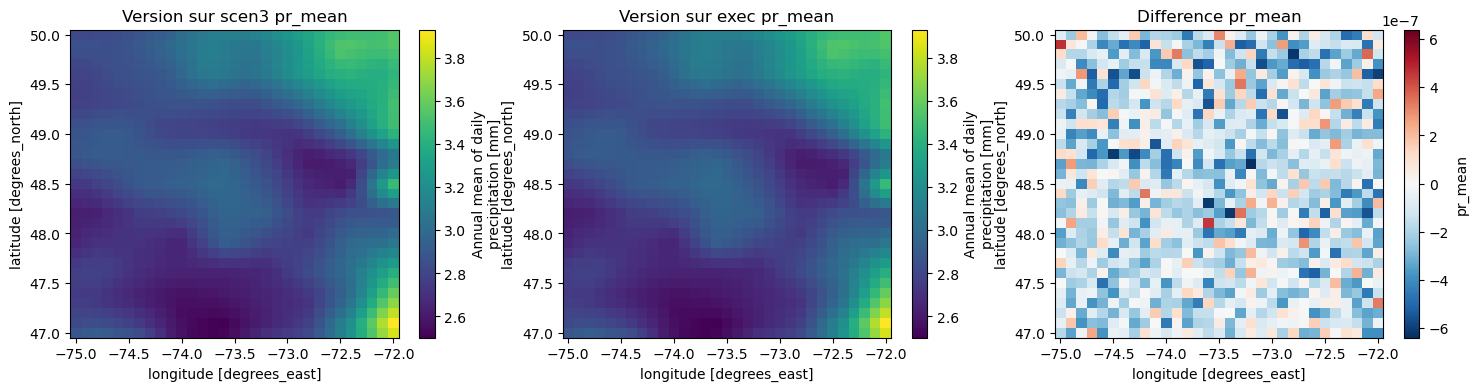

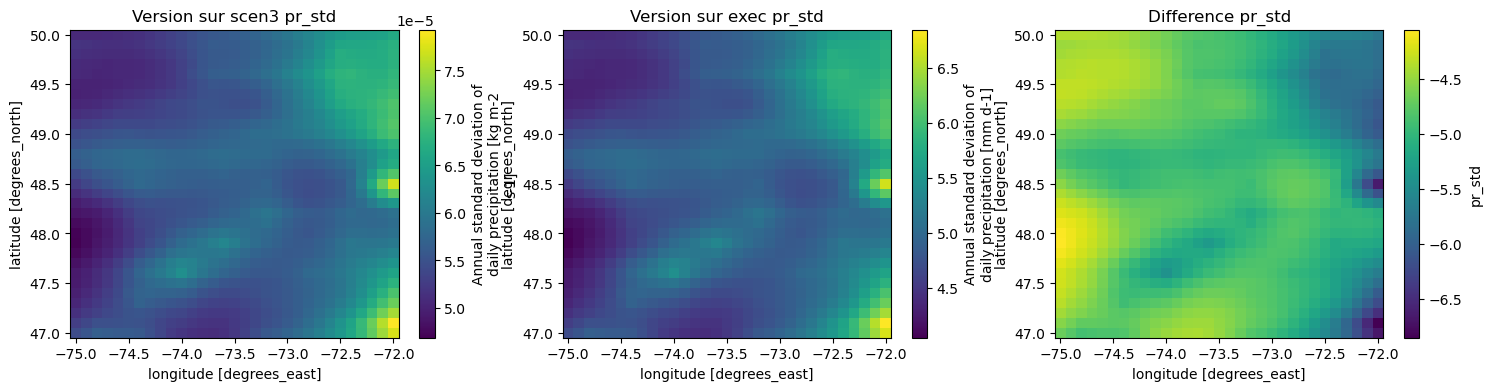

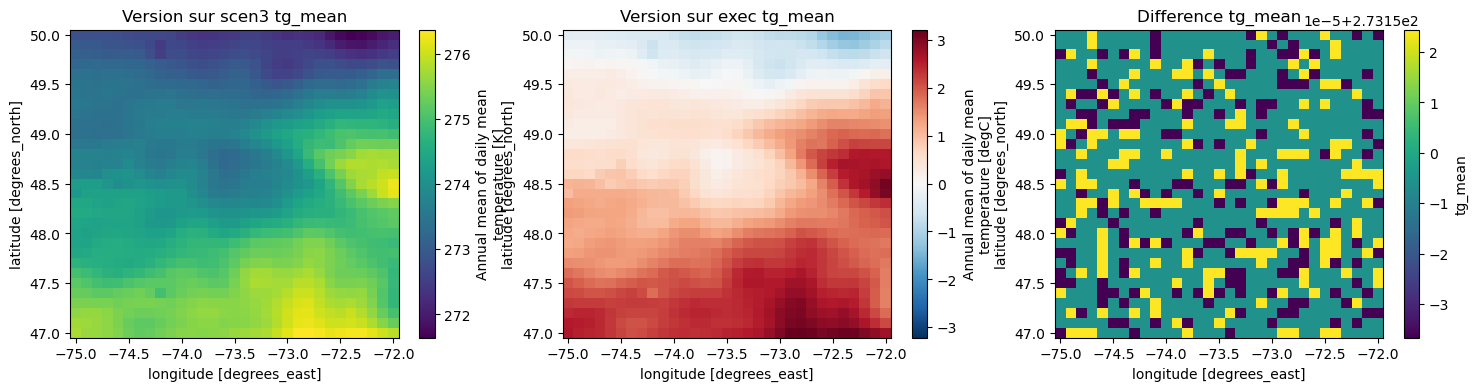

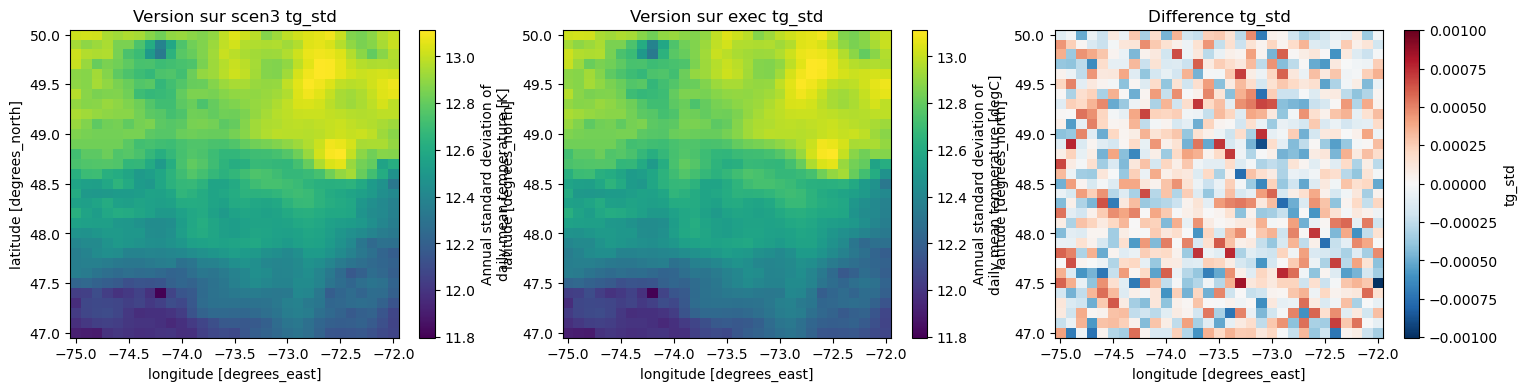

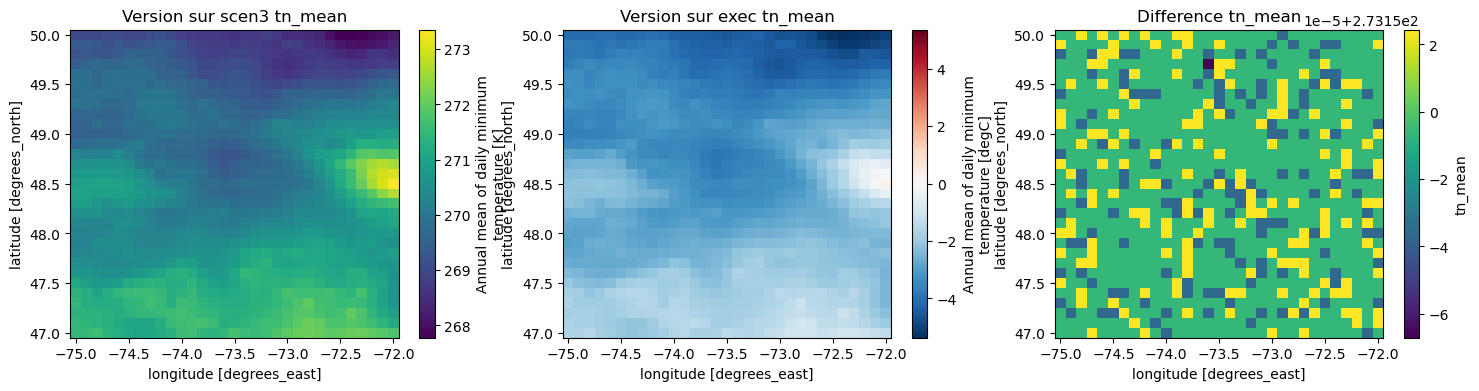

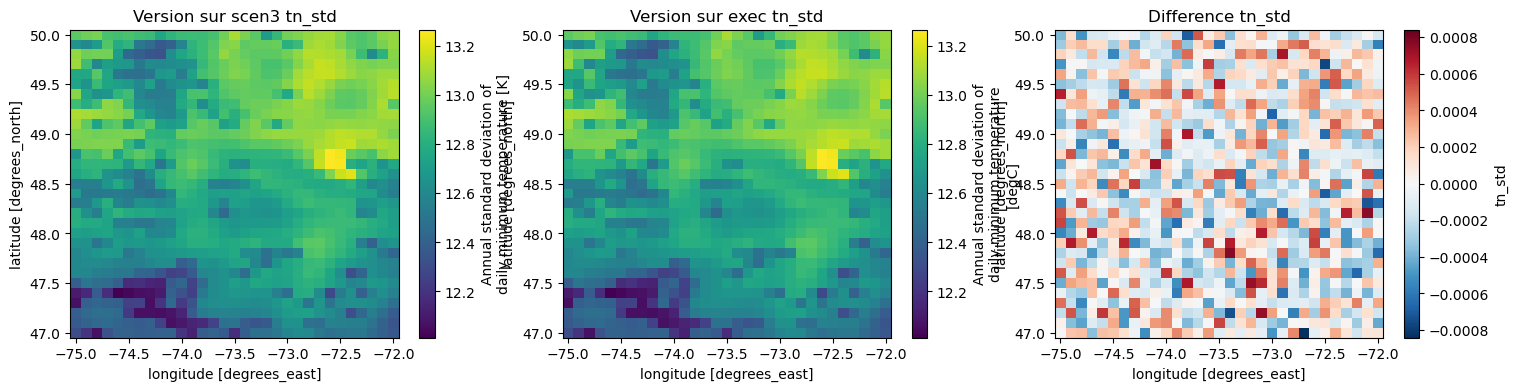

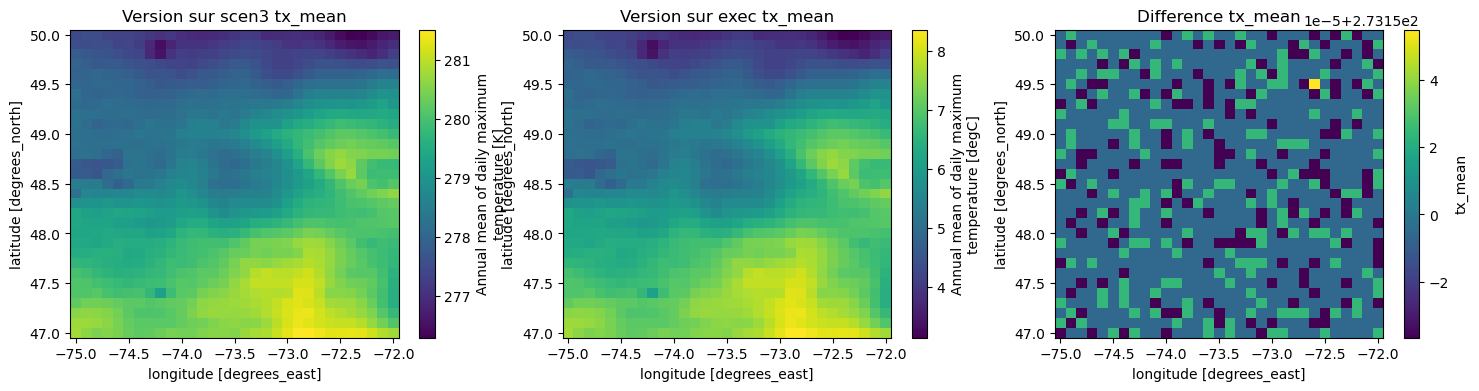

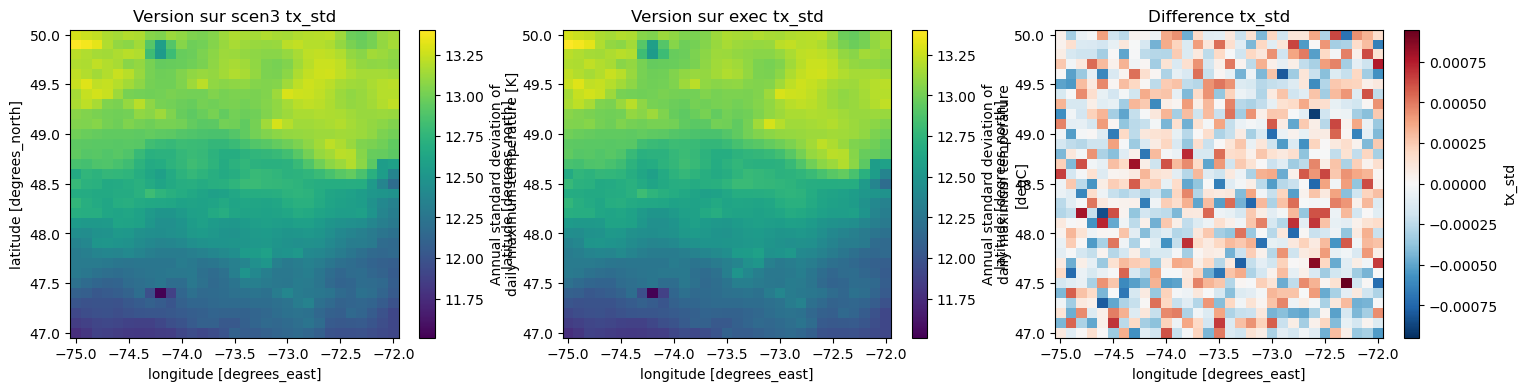

In [7]:
import xarray as xr
from clisops.core.subset import subset_bbox
import matplotlib.pyplot as plt

freq = 'AS-JAN'

ds1 = xr.open_dataset(f'/scen3/braun/data/obs_synthese23/indicators/ECMWF_ERA5-Land_NAM_{freq}_indicators.zarr', engine='zarr')
#ds2 = xr.open_dataset(f'/scen3/braun/data/obsflow/tests_reference/indicators/ECMWF_ERA5-Land_NAM_{freq}_indicators.zarr', engine='zarr')
ds2 = xr.open_dataset(f'/exec/braun/data/obsflow/indicators/ECMWF_ERA5-Land_NAM_reconstruction_{freq}_indicators.zarr', engine='zarr')


my_bbox = {'lon_bnds': [-75, -72], 'lat_bnds' : [47, 50]}
dsb1 = subset_bbox(ds1, **my_bbox)
dsb2 = subset_bbox(ds2, **my_bbox)

display(dsb1)
display(dsb2)
for var in dsb1.data_vars.keys():
    fig, ax = plt.subplots(1, 3, figsize=(18, 4))
    dsb1[var].isel(time=0).plot(ax=ax[0], x='lon', y='lat')
    ax[0].set_title(f'Version sur scen3 {var}')
    dsb2[var].isel(time=0).plot(ax=ax[1], x='lon', y='lat')
    ax[1].set_title(f'Version sur exec {var}')
    diff = dsb1[var].isel(time=0) - dsb2[var].isel(time=0)
    diff.plot(ax=ax[2], x='lon', y='lat')
    ax[2].set_title(f'Difference {var}')

In [ ]:
ds2